In [27]:
%load_ext autoreload
%autoreload 2

import numpy as np

from mopet import mopet
from synchronization import plots
from synchronization import runner
from synchronization import constants

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
REMOTE = True

# Visualization of Parameter Explorations

In this notebook the exploration results are visualized.
Idea is to use only 2-3 cells per exploration and as little code as possible.
Exploration are visualized by using abstracted functions, and we just use the name of the exploration to load the results from `mopet`.

There should only be minimal modification to individual explorations, we mostly stick to plot collections offered by `plots`.

# Synaptic Weights Exploration Results

Exploration to find proper values for E to I and I to E weights.

We see that values below $3.5$ or $4.0$ lead to frequency peak close to 0.

Further, we would consider the model behavior between $3.5$ and $4.5$ to be fragile, dominant frequency jumps from high vaues to low values irregularly.

Exploration needs to be extended, we need to test values above 4.5. We did this in the following exploration.

In [29]:
ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params={},
    hdf_filename=f"{constants.get_base_path(REMOTE)}/synaptic_weights.h5",
    exploration_name="synaptic_weights_mu_100"
)
ex.load_results(all=True)

100%|██████████| 400/400 [03:02<00:00,  2.19it/s]


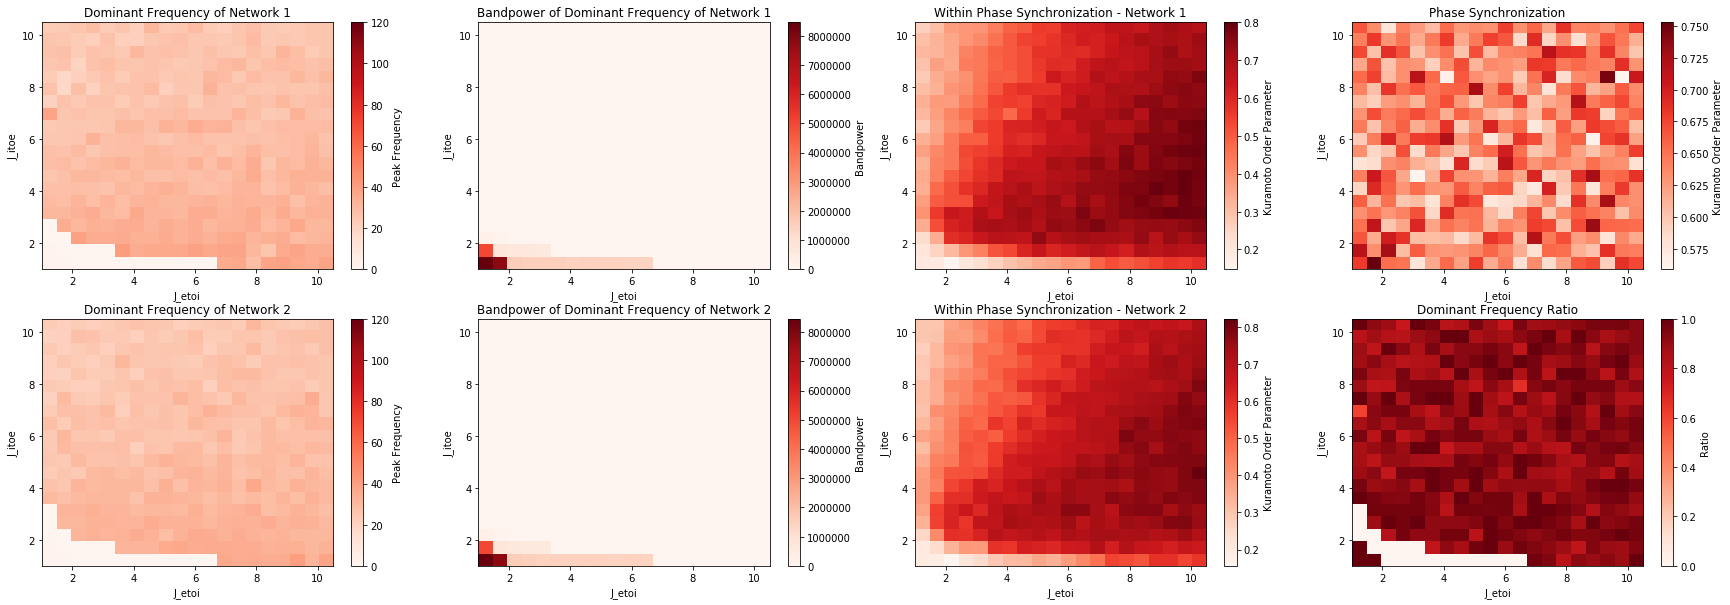

In [30]:
plots.plot_exploration(ex=ex, vmax_phase=None, vmin_phase=None)

Below you can see the plots of one specific run.

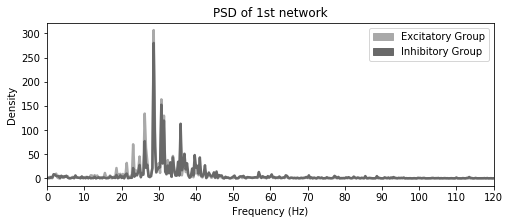

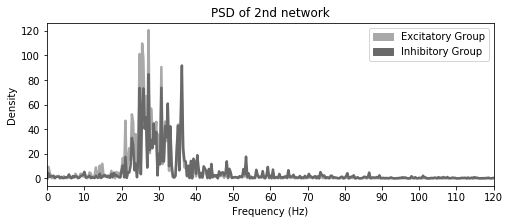

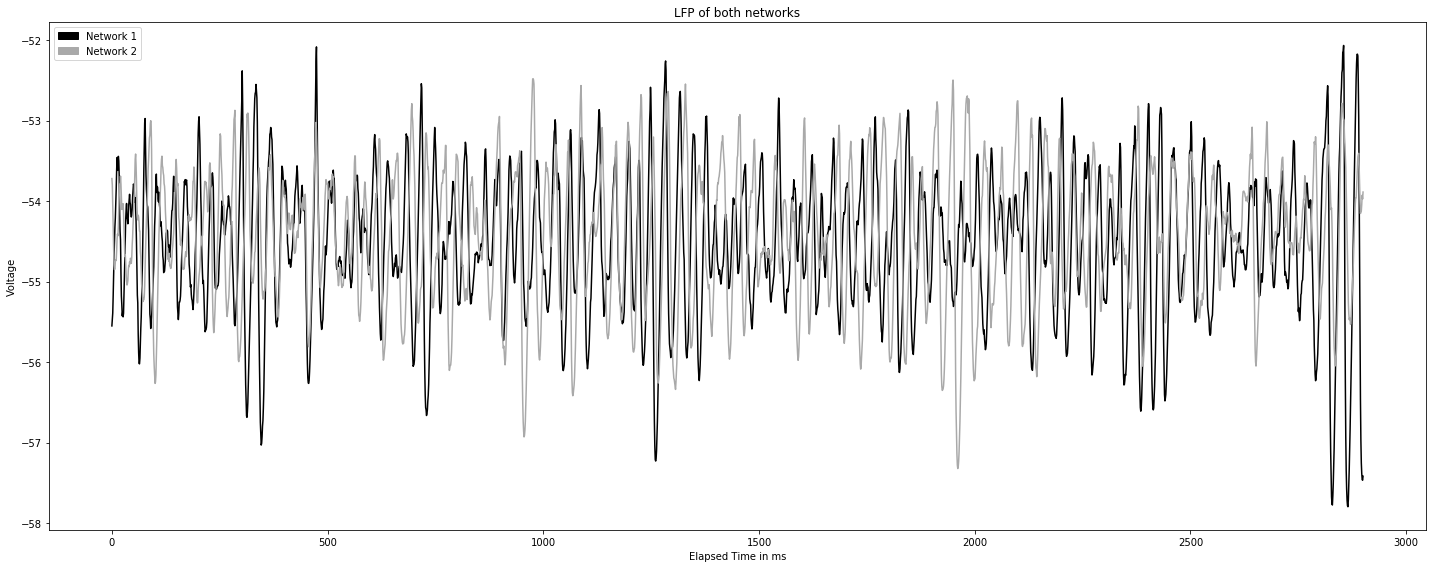

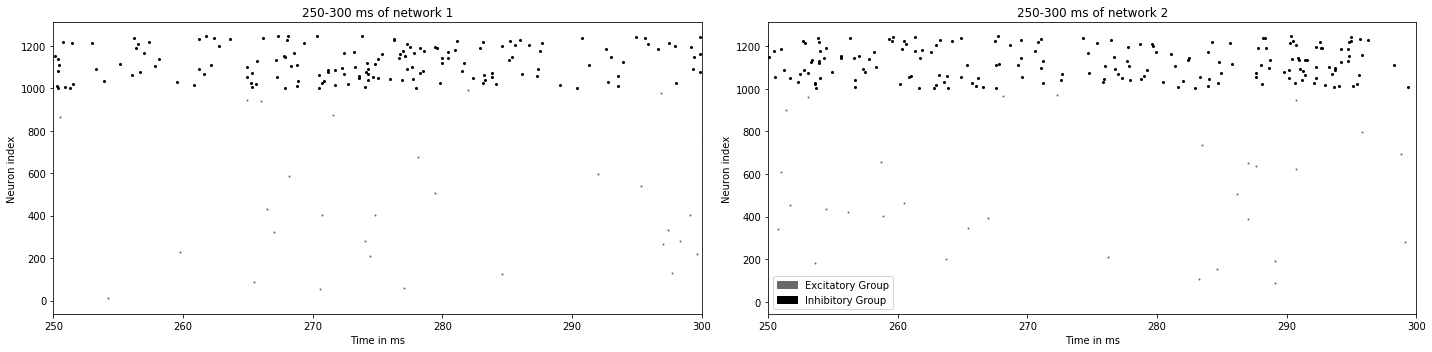

In [31]:
plots.plot_results(ex.results[121])

# Exploration: Noise Ratio and Noise Strength


### Setup and Expectation

We investigate here synchronization of two networks subject to different strength of uncorrelated noise.

Coupling strength is fixed. 

We expect that noise strength alone is able to synchronize both networks although worsening inter-network synchronization. This would be in accordance with Meng et al. findings. Phase space (or frequency-ratio) plot of Meng (Figure 3B in the paper) is added here for direct comparison.

We look at synchronization based on two features of the signals: frequency and phase.

<img width=600 src="files/meng_phase_space.png">


### Interpretation of Results

* Dominant Frequency of both Networks vary seemingly random, irregular behavior, sudden jumps from high frequencies (100 - 120 Hz) to low frequencies (0-20)
* Within phase synchronization and phase synchronization does not change significantly across parameter combinations.
* Dominant frequency ratio is as well not correlated with $p$ or $\sigma^2$

In our selected model we could not observe the synchronization mechanism. Rather, the uncorrelated  noise acts as expected: Leading to instable behavior by disturbing the necessary balance between E to I populations.

### Questioning the Results

The selected parameter regime is clearly very sensitive to uncorrelated noise. Now, there are two possible directions that we can go. 

(1) Search for different plausible parameter regimes that are more robust and run the exploration again. Different coupling strengths and connectivity might lead to different results. We cannot draw a conclusion based on one parameter configuration.

(2) Modify the noise framework. 

Maybe, the noise input is too strong even with low values. Christoph Börgers stated in *An Introduction to Modeling Neuronal Dynamics* that PING mechanism requires that inhibitory neurons should fire mainly due to influence of E population. However, in our example inhibitory neurons fire frequently even without being connected to E neurons due to the uncorrelated noise input (this can be seen in the `coupled_network_PING_analysis` notebook in section *No Connectivity and Uncorrelated Noisy Input*). We could not find a parameter regime in this noise scenario that shows the characteristic temporal firing difference between E and I neurons. Thus, we could require that noise input stays so low for I group that membrane voltage stays mostly below the threshold. We still have uncorrelated noise, but it acts in the form of weak background fluctuations instead of strong input from another E population.

Nevertheless, we currently used fixed mean noise input identical to Meng. However, we should investigate the influence of different mean inputs on the model. We consider it probable that a lower mean input leads to quite different results.




In [32]:
ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params={},
    hdf_filename=f"{constants.get_base_path(REMOTE)}/uncorrelated_noise.h5",
    exploration_name="uncorrelated_noise_mu_100"
)
ex.load_results(all=True)

100%|██████████| 190/190 [00:30<00:00,  6.32it/s]


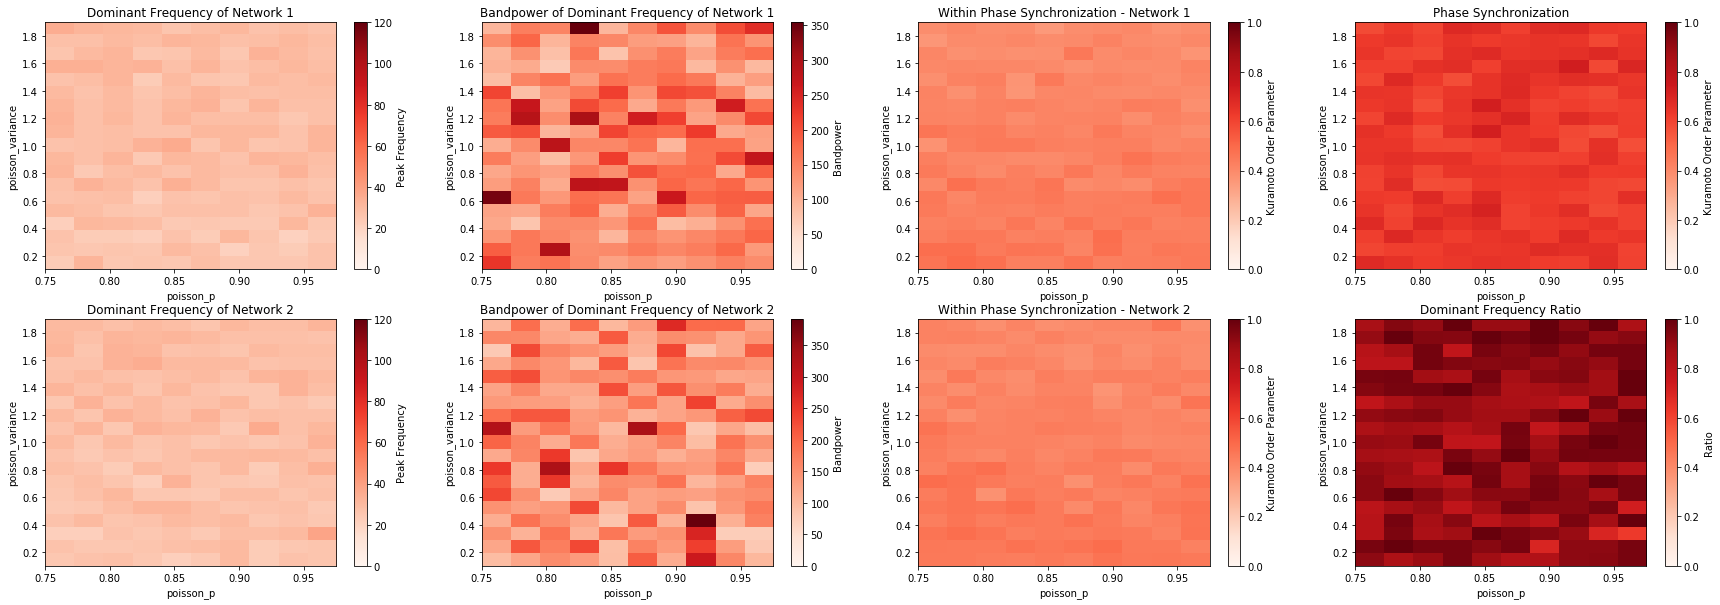

In [33]:
plots.plot_exploration(ex)

# Exploration: Noise ratio and variance with $\mu = 80 Hz$

We repeat the experiment with $\mu$ of 80, because 200 is too high. 200 leads to dominant firing frequencies above 80 Hz which is not in the gamma range. Input is too strong.

In [34]:
# ex = mopet.Exploration(
#     runner.run_in_mopet, 
#    explore_params={},
# hdf_filename=f"{constants.get_base_path(REMOTE)}/uncorrelated_noise.h5",
#     exploration_name="uncorrelated_noise_mu_80"
# )
# ex.load_results(all=True)

In [35]:
# plots.plot_exploration(ex)

In [36]:
#print(ex.params[14])
# plots.plot_results(ex.get_run(14), full_raster=True)

In [37]:
# print(ex.params[102])
# plots.plot_results(ex.get_run(102), full_raster=True)

In [38]:
# print(ex.params[142])
# plots.plot_results(ex.get_run(142), full_raster=True)

# Exploration: Influence of Mean Noise Input

We assess if the choice of the mean input could have a significant impact on our results.
Therefore, we explore different values for $\mu$ of the PoissonGroup and noise strength $\sigma^2$.

Poisson ratio $p$ has been set to $0.875$.

### Results

* As expected, with higher mean input the neurons fire more frequently, leading to higher peak frequencies.
* High values for phase synchronization are produced by almost no activity being present in the networks for very low strength (0.4). Low noise strength $\sigma^2$ leads to higher Poisson rates $\lambda$ but lower input strength $\Delta v_i$.
* We also see no correlation between mean input and ratio of dominant frequencies.

### Interpretation

* Different mean noise input $\mu$ will lead to similar results.


In [39]:
ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params={},
    hdf_filename=f"{constants.get_base_path(REMOTE)}/mean_noise_input.h5",
    exploration_name="mean_noise_input_4"
)
ex.load_results(all=True)

100%|██████████| 96/96 [00:15<00:00,  6.40it/s]


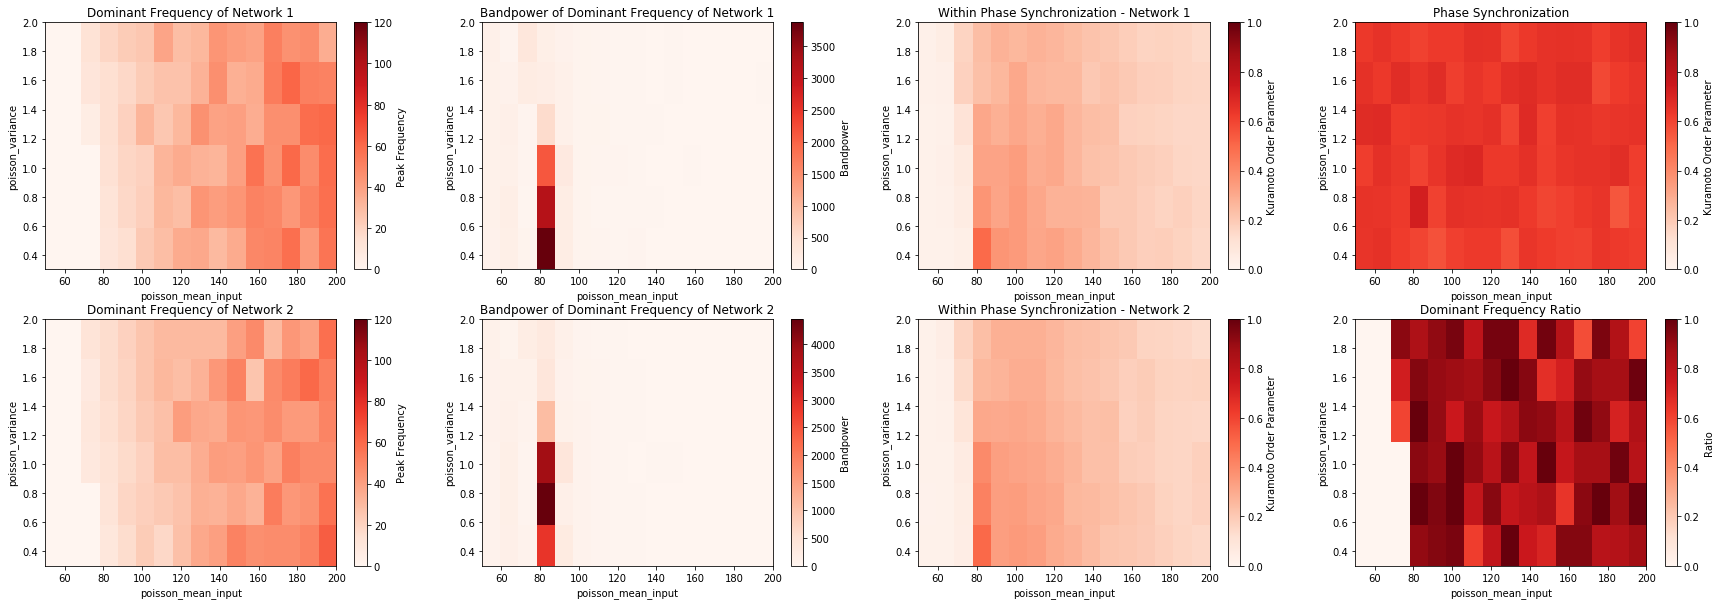

In [40]:
plots.plot_exploration(ex)

In [41]:
[(key, value) for (key, value) in ex.params.items() if value["poisson_mean_input"] == 100]

[(21, {'poisson_mean_input': 100.0, 'poisson_variance': 0.5}),
 (37, {'poisson_mean_input': 100.0, 'poisson_variance': 0.7}),
 (5, {'poisson_mean_input': 100.0, 'poisson_variance': 0.3}),
 (53, {'poisson_mean_input': 100.0, 'poisson_variance': 1.0}),
 (69, {'poisson_mean_input': 100.0, 'poisson_variance': 1.5}),
 (85, {'poisson_mean_input': 100.0, 'poisson_variance': 2.0})]

In [42]:
# access all runIds and correpsonding params
print(ex.params[16])

{'poisson_mean_input': 50.0, 'poisson_variance': 0.5}


{'poisson_mean_input': 90.0, 'poisson_variance': 0.5}


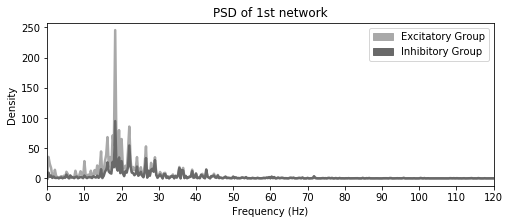

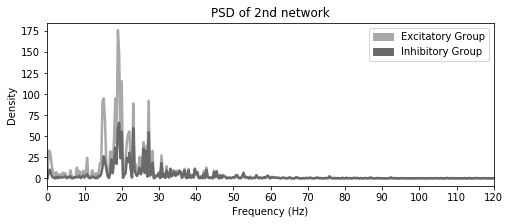

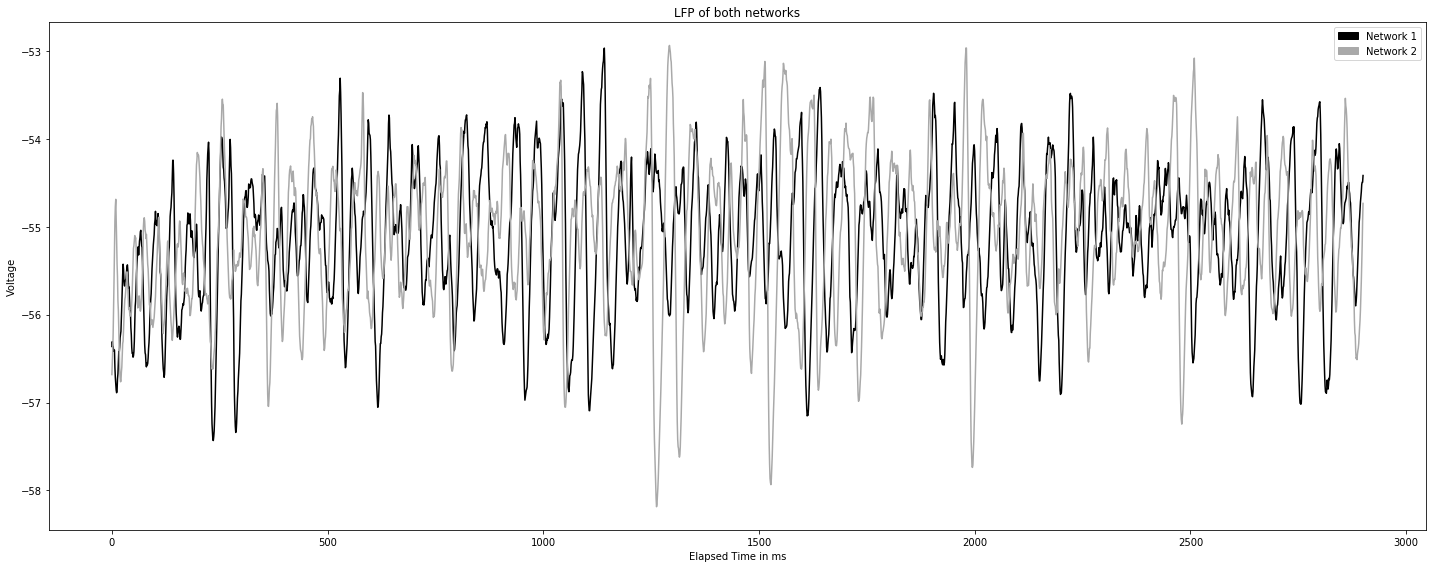

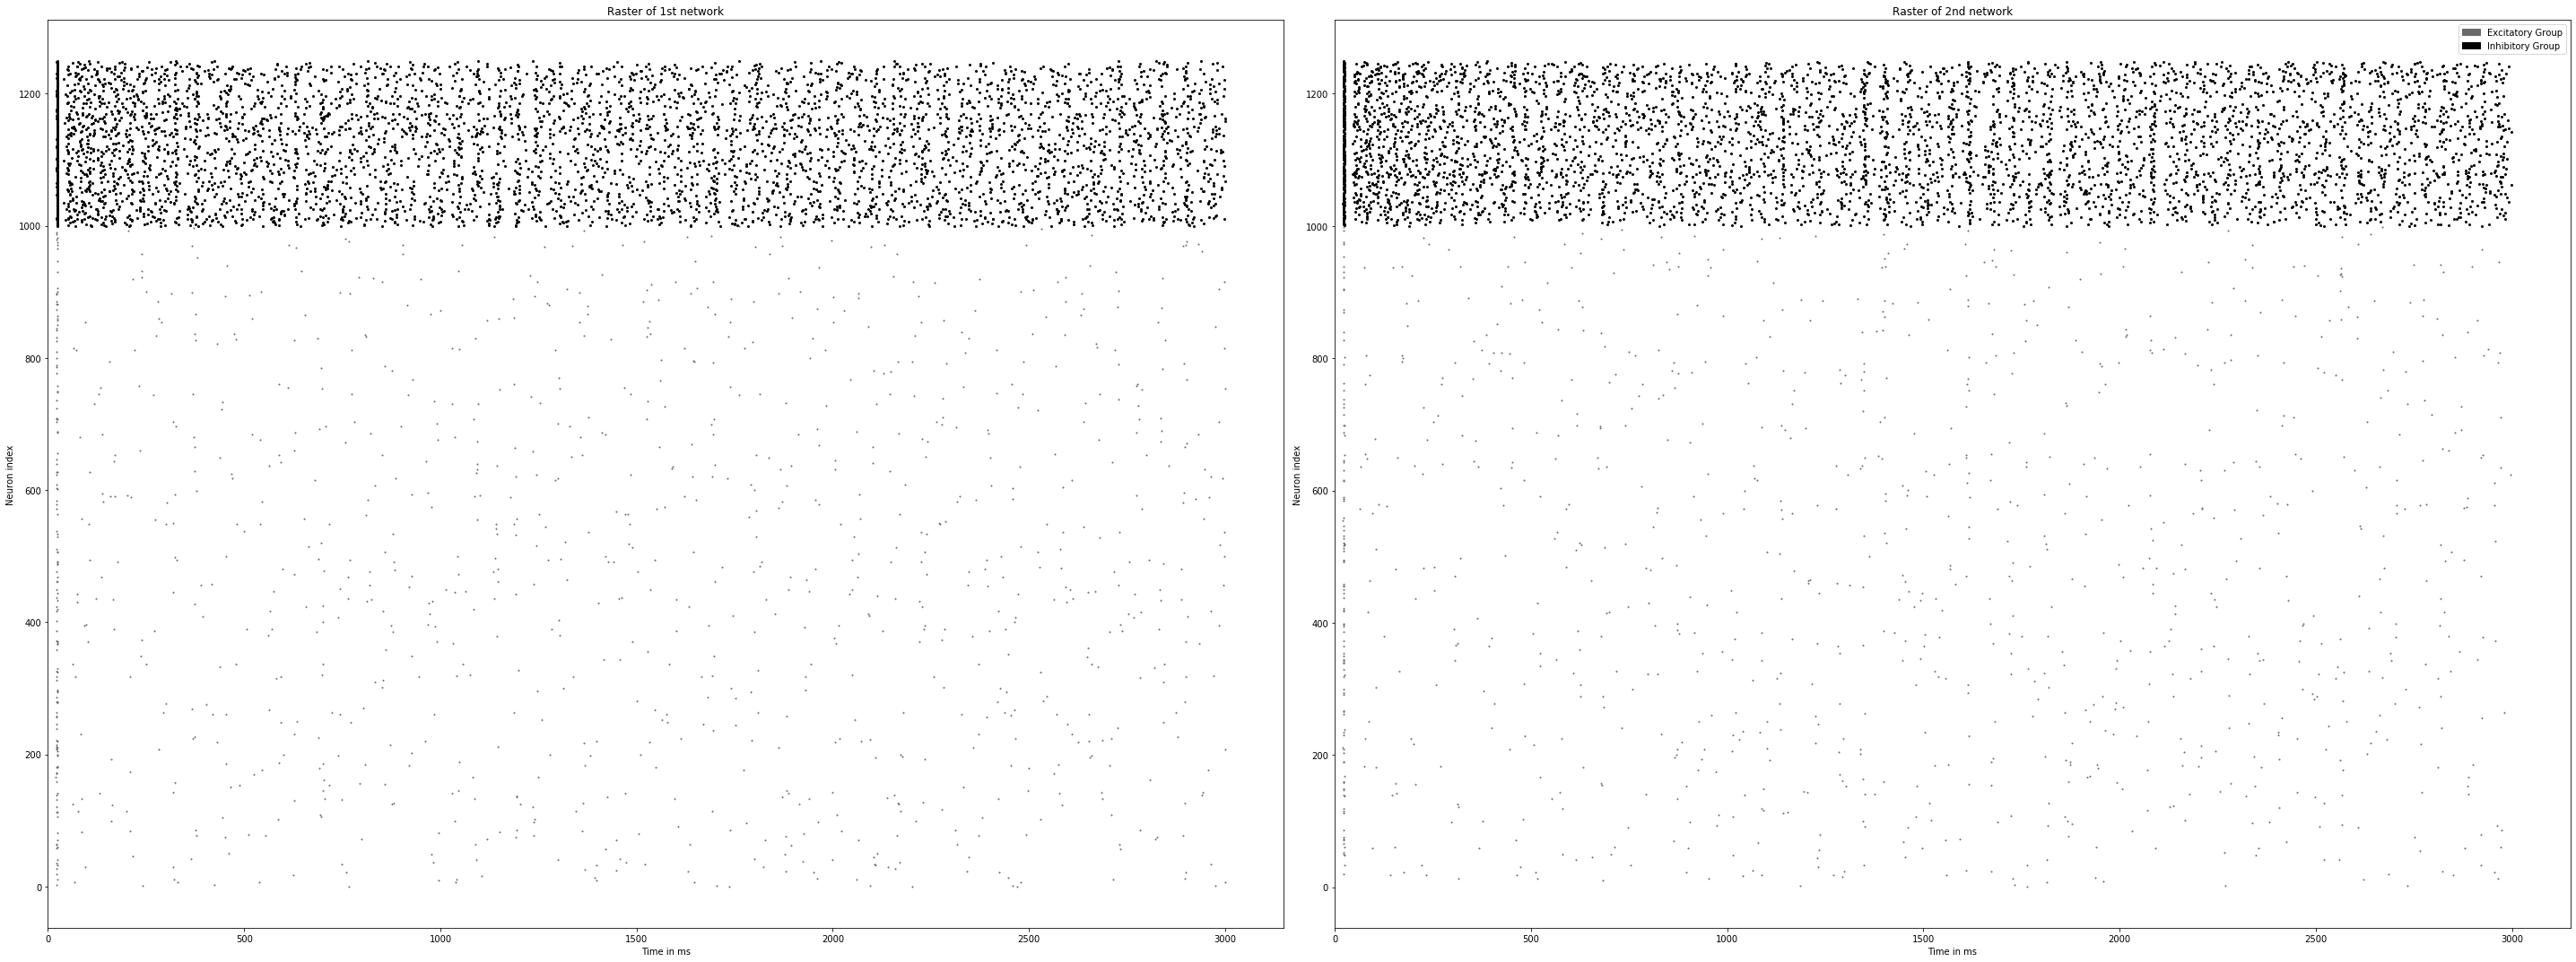

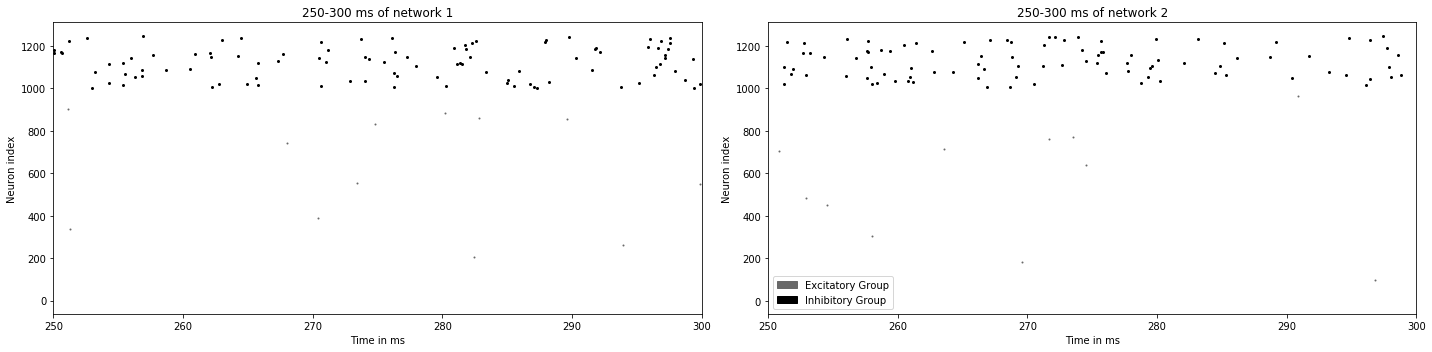

In [43]:
# 20 Hz Peak, 90 mu and 0.5 sigma
print(ex.params[20])
plots.plot_results(ex.get_run(run_id=20), full_raster=True)

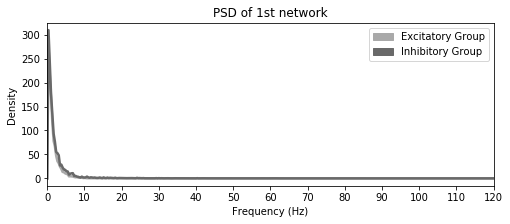

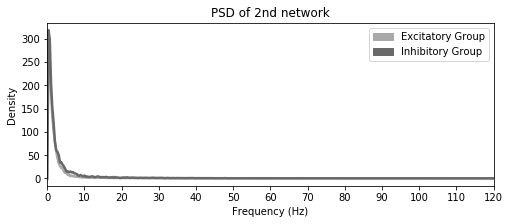

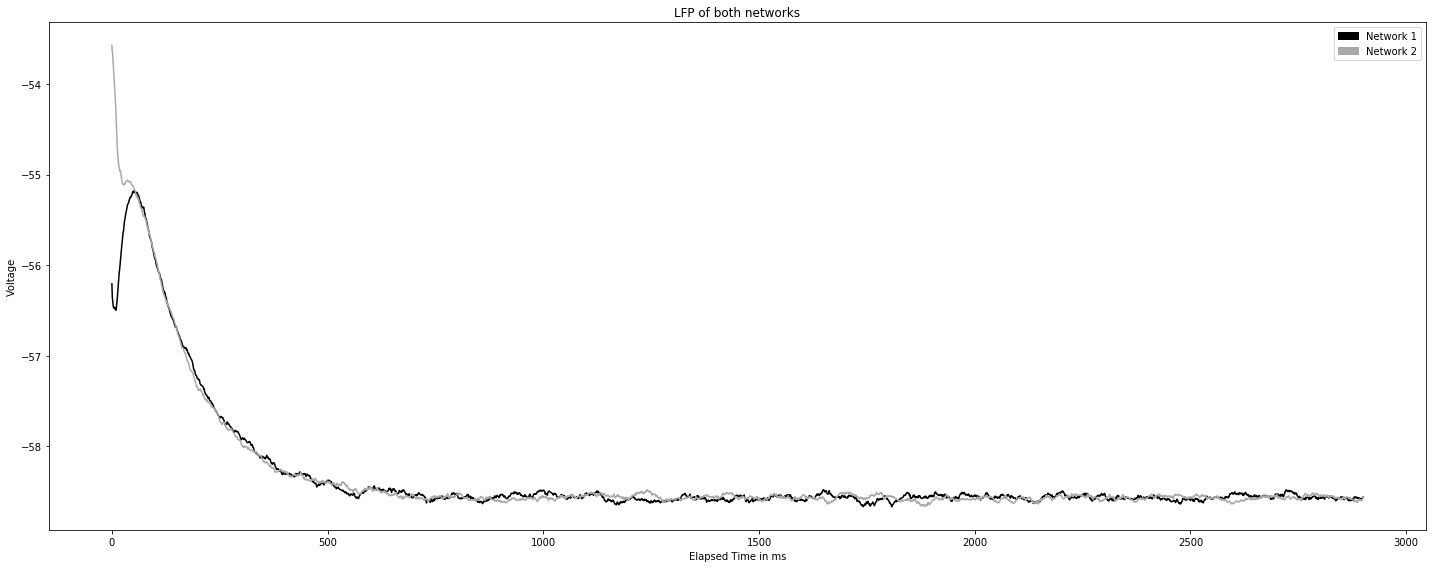

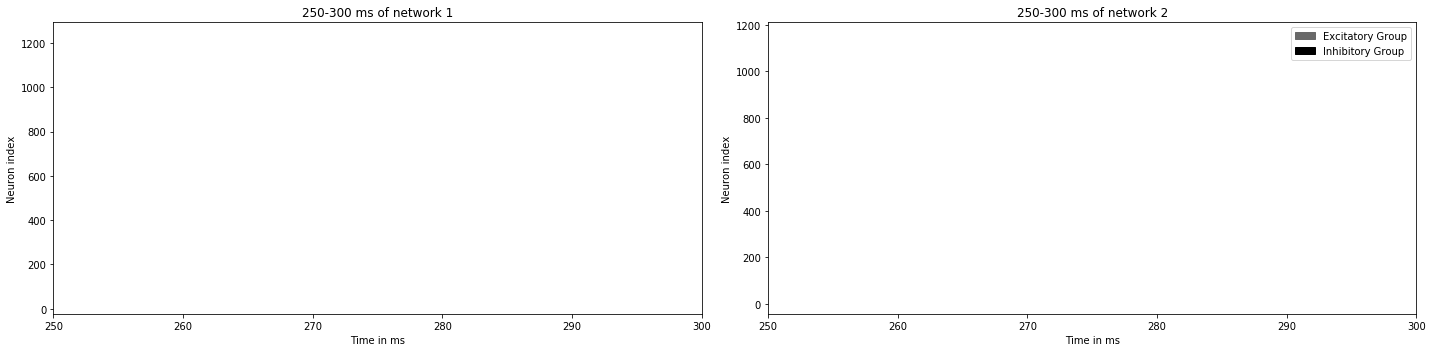

In [44]:
# No activity, mean noise input too low
plots.plot_results(ex.get_run(run_id=16), full_raster=False)

{'poisson_mean_input': 100.0, 'poisson_variance': 2.0}


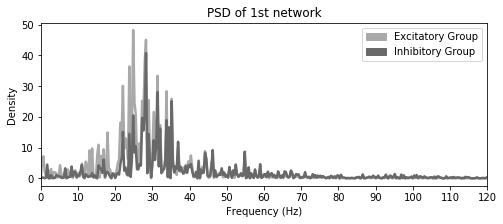

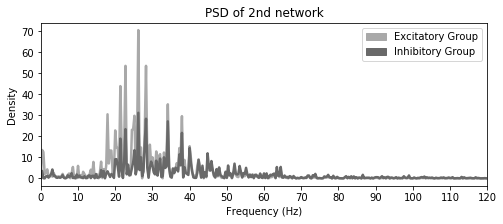

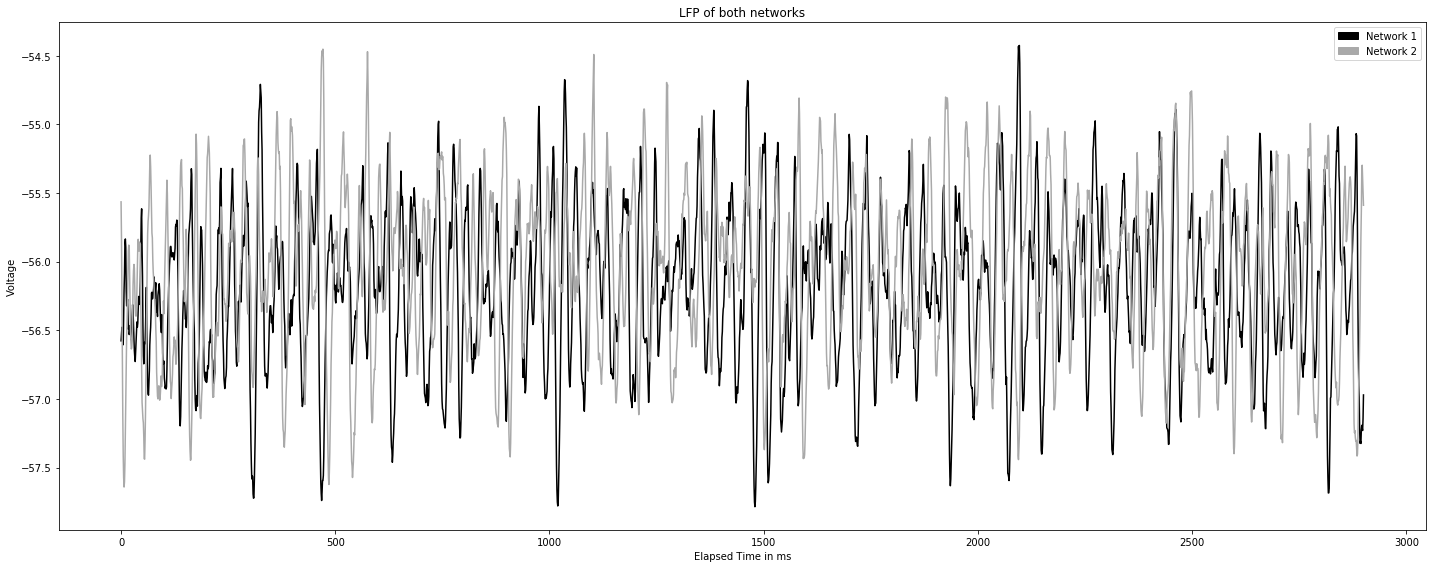

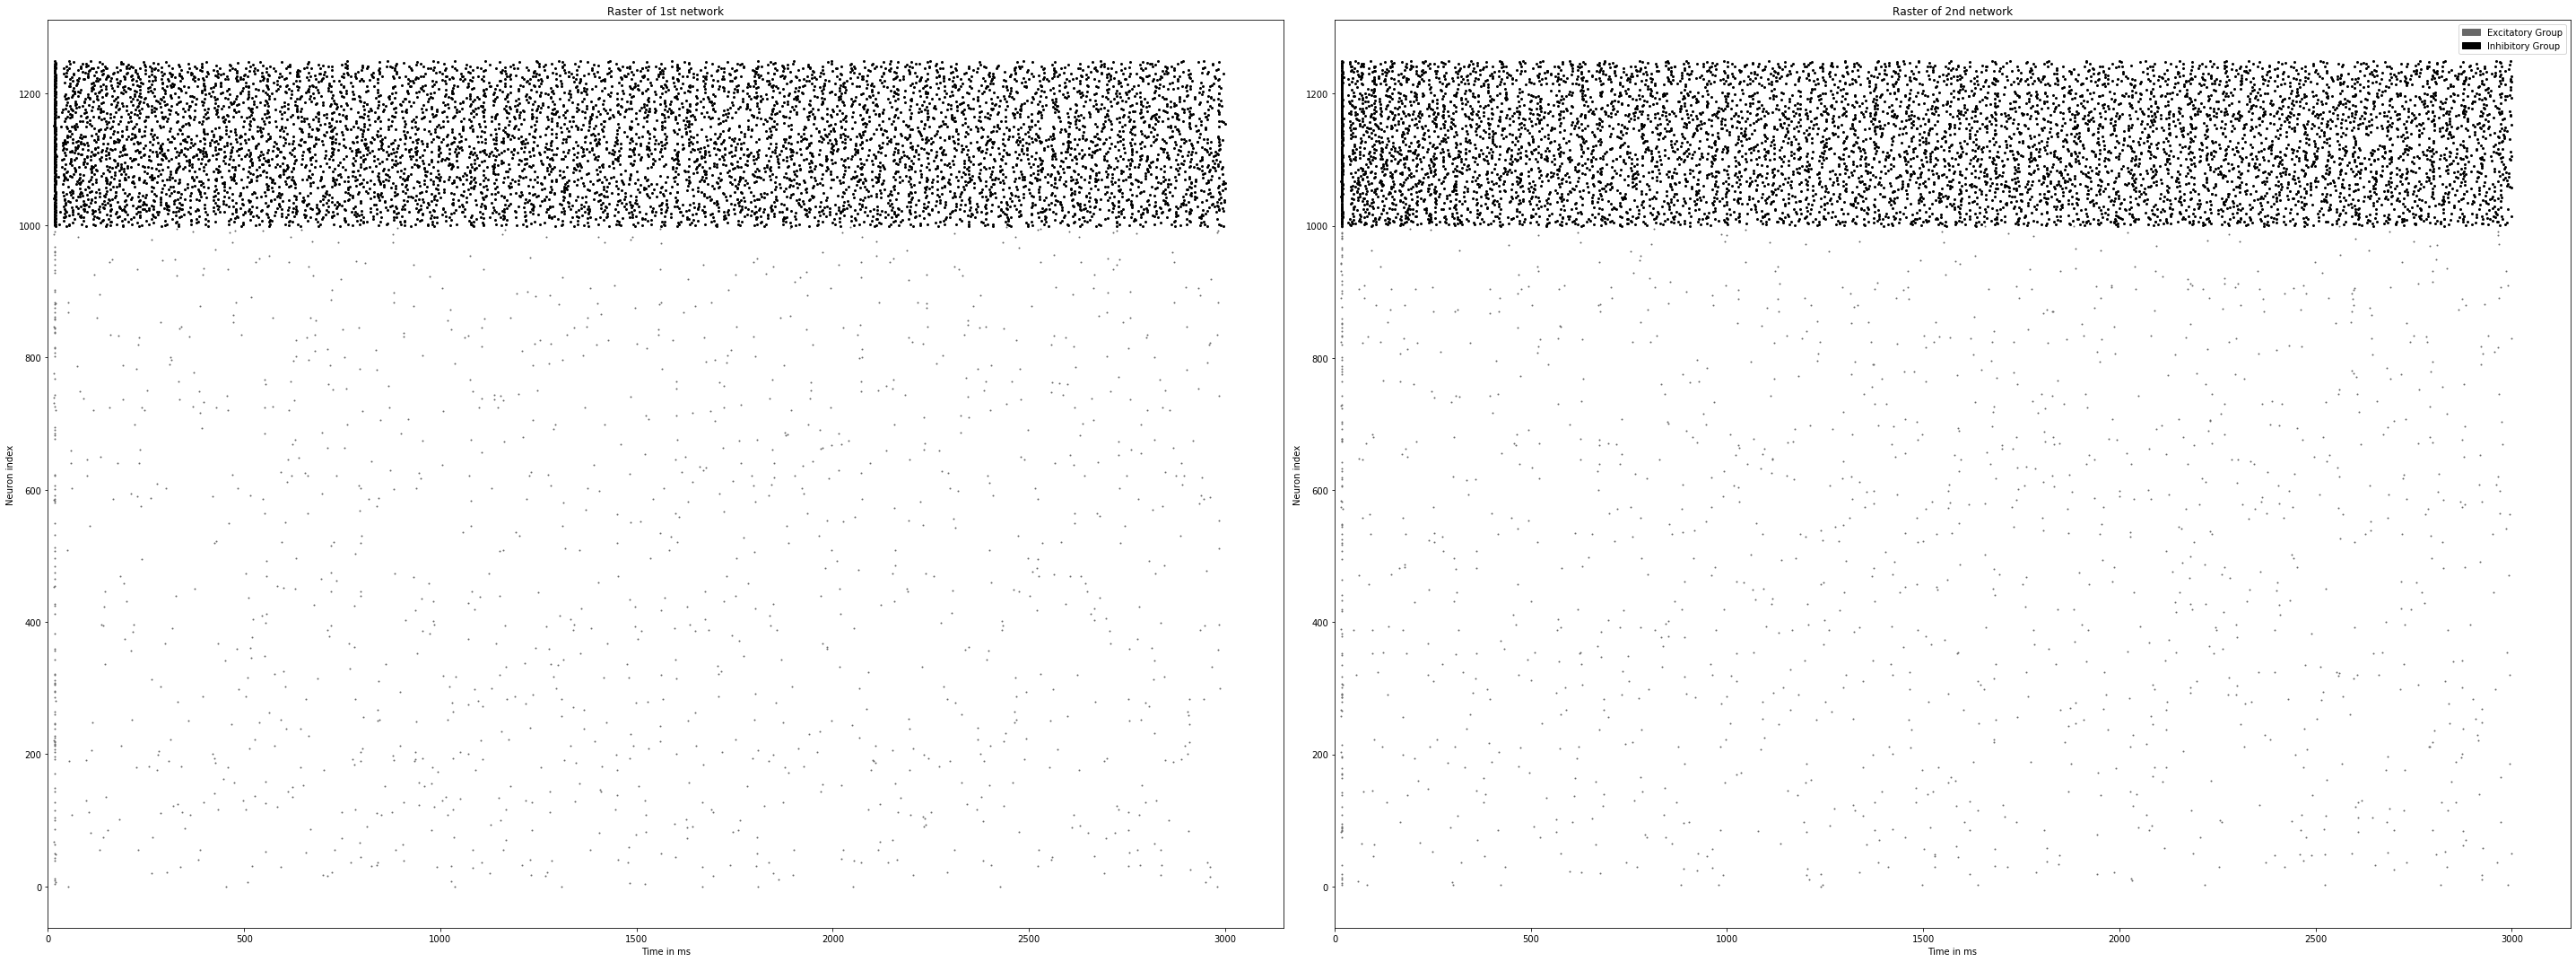

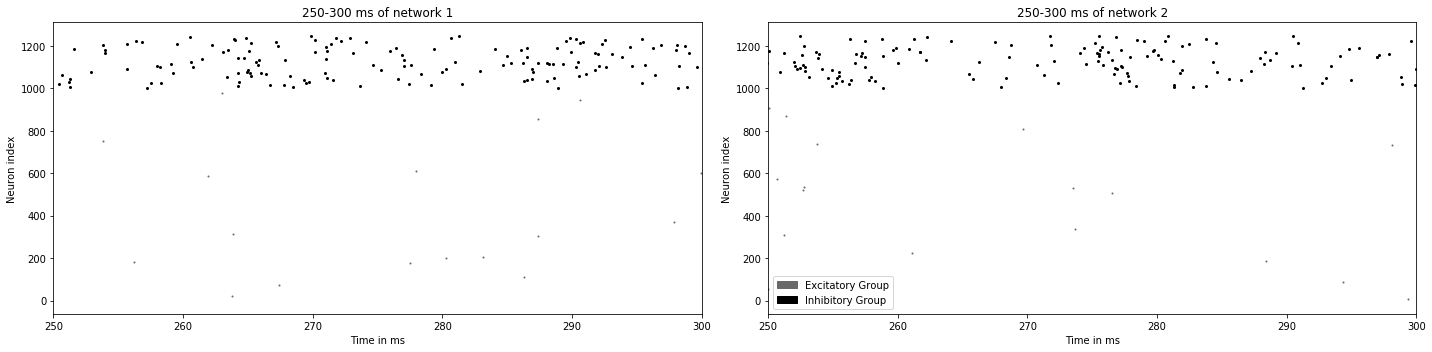

In [45]:
print(ex.params[85])
plots.plot_results(ex.get_run(run_id=85), full_raster=True)